# Exploring Police Killings Across US States

The following project will examine the extent of police killings across all US states. 

The data set consists of a small sample of recorded killings (467 instances) for the year 2015, across all US states.

In [1]:
import pandas as pd
police_killings = pd.read_csv(r"C:\projectdatasets\police_killings.csv", encoding="ISO-8859-1")
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [39]:
# quick analysis of the data
police_killings.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [2]:
# show all columns
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [5]:
# show all unique values in 'raceethnicity' column
counts = police_killings["raceethnicity"].value_counts()
counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

([<matplotlib.axis.XTick at 0x228e136b5f8>,
 <a list of 6 Text xticklabel objects>)

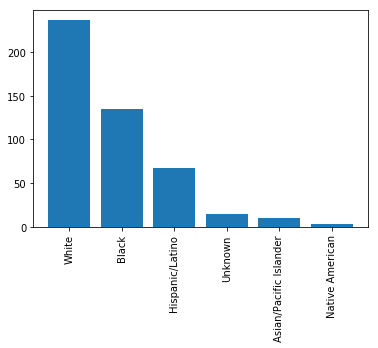

In [12]:
# plot a graph of the above
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation="vertical")

In [20]:
# show the counts as a proportion of the whole
counts / sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

## Racial Breakdown

We can see that people identified as Black are overrepresented (28%) in the shootings, vs the rest of the population of the US (16%).

People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic vs 17% of the overall population).

Whites appear underrepresented among shooting victims, vs their population percentage (76%), as are Asians.

## Income Breakdown

In [17]:
# we will examine the incomes of the victims
police_killings["p_income"].head()

0    28375
1    14678
2    25286
3    17194
4    33954
Name: p_income, dtype: object

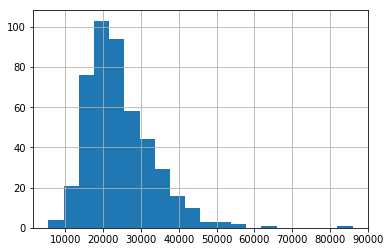

In [18]:
# create a histogram showing range of incomes of the victims
# first remove any values with '-', convert remaining values to float, and plot
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)

In [19]:
# show the median salary
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()

22348.0

According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make generalised conclusions

We will now import a new dataset consisting of state information and populations for 2015

In [30]:
state_pop = pd.read_csv(r"C:\projectdatasets\state_population.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [25]:
counts = police_killings["state_fp"].value_counts()
counts

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
Name: state_fp, dtype: int64

In [29]:
# create a new dataframe of each state and the count of shootings
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [31]:
# merge the new 'states' dataframe we created above with the 'state_pop'
states = states.merge(state_pop, on="STATE")

In [33]:
# show the merged dataset
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [34]:
# create new column 'pop_millions' to show the population of each state in millions
# we can see that California has a population of 39.1 million
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["pop_millions"].head()

0    39.144818
1    27.469114
2    20.271272
3     6.828065
4     3.911338
Name: pop_millions, dtype: float64

In [35]:
# create new column 'rate' to show the proportion of shootings in relation to the population of each state
states["rate"] = states["shootings"] / states["pop_millions"]
states["rate"].head()

0    1.890416
1    1.711013
2    1.430596
3    3.661359
4    5.624674
Name: rate, dtype: float64

In [38]:
states.sort_values(by=["rate"])

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


## Killings By State

We can see that states in the midwest and south have the highest police killing rates, whereas those in the northeast seem to have the lowest.

In [50]:
police_killings[["share_white","share_black","share_hispanic"]].head()

,share_white,share_black,share_hispanic
0,60.5,30.5,5.6
1,53.8,36.2,0.5
2,73.8,7.7,16.8
3,1.2,0.6,98.8
4,92.5,1.4,1.7


In [41]:
# remove any '-' f they appear in all the columns above (removes 2 rows)
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

In [54]:
# convert each of the columns to a float datatype
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [56]:
# record the lowest state and highest states according to shooting rates
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [57]:
# create new dataframes by filtering only on the states that have the lowest, and highest, shooting rates
ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [60]:
# select only a certain number of columns to examine
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]
ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [61]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

## Conclusion

We can see that the states with low rates of shootings tend to have a higher proportion of whites in the population. It also looks like the income of the states where the shootings occur is higher.

States with high rates of shootings tend to have higher hispanic population shares too.